## Bipartite networks from Chowdhary and Assisi, 2019

#### To-do list
3. Bipartite networks
	1. No within-group connections
		- Only inhibitory
		- Only excitatory
	2. Complementary edges are excitatory connections
		- (Mix of inhibitory and excitatory)
	3. Ratio of cumulative strength of excitation/inhibition is varied
		- Varied by changing p (changing number of connections of each type)
		- Varied by changing strengths of each type


- Bipartite network
	- Is there synchrony between neurons of the same group, even without excitatory connections?
	> Our simulations showed that while connected neurons did
	> not fire together, nodes from the same partition did not
	> fire synchronously either.
- Sudoku network
- Vogels' model
	- What kind of connections between inhibitory and excitatory groups (E-I, I-I, I-E)

#### Imports/Init

In [1]:
from brian2 import *

INFO       Cache size for target 'cython': 2600153502 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the 'C:\Users\admin\.cython\brian_extensions' directory. [brian2]


In [2]:
%matplotlib notebook

In [3]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

## No within-group connections

#### Inhibitory connections only

In [4]:
# From starter.ipynb
# Init all 100 neurons with random starting V, the groups G1 and G2 are connected with probability of 0.6 as in the paper
# (only inhibitory connections across the groups, no other connections)

start_scope()

exc = 0.001
n = 100

np.random.seed(10)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')

group1init = np.random.randint(0, 9, size=n)/10
group2init = np.random.randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

# G1.v = 'rand()'
# G2.v = 0.

In [5]:
S1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')
S2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

p = 0.6

S1.connect(p = p)
S2.connect(p = p)

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

In [6]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

<IPython.core.display.Javascript object>

Phase asynchrony is observed.

#### Excitatory connections only

In [7]:
# Init all 100 neurons with random starting V, the groups G1 and G2 are connected with probability of 0.6 as in the paper
# (only excitatory connections across the groups, no other connections)

start_scope()

exc = 0.001
n = 100

np.random.seed(10)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')

group1init = np.random.randint(0, 9, size=n)/10
group2init = np.random.randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

In [8]:
S1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

p = 0.6

S1.connect(p = p)
S2.connect(p = p)

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

In [9]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

Phase synchrony is observed.

#### Phase Space plots

In [10]:
polared = lambda t, M : M.v[:,t] * 2*pi
dummy = ones(n)*5
alph = 0.2
polar(polared(0, M1), dummy, 'bo', alpha = alph)
polar(polared(0, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1387562376.py:4: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(0, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1387562376.py:5: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(0, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [11]:
polar(polared(10, M1), dummy, 'bo', alpha = alph)
polar(polared(10, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1338631087.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(10, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1338631087.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(10, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [12]:
polar(polared(100, M1), dummy, 'bo', alpha = alph)
polar(polared(100, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2504274222.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(100, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2504274222.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(100, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [13]:
polar(polared(210, M1), dummy, 'bo', alpha = alph)
polar(polared(210, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1520816551.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(210, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\1520816551.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(210, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [14]:
polar(polared(400, M1), dummy, 'bo', alpha = alph)
polar(polared(400, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2169073338.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(400, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2169073338.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(400, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [15]:
polar(polared(450, M1), dummy, 'bo', alpha = alph)
polar(polared(450, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\82851495.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(450, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\82851495.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(450, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [16]:
polar(polared(430, M1), dummy, 'bo', alpha = alph)
polar(polared(430, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2483315913.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(430, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\2483315913.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(430, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [17]:
polar(polared(490, M1), dummy, 'bo', alpha = alph)
polar(polared(490, M2), dummy, 'ro', alpha = alph)

WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\4287371296.py:1: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(490, M1), dummy, 'bo', alpha = alph)
 [py.warnings]


WARNING    C:\Users\admin\AppData\Local\Temp\ipykernel_29392\4287371296.py:2: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  polar(polared(490, M2), dummy, 'ro', alpha = alph)
 [py.warnings]


In [18]:
# should plot phase space at the start vs towards the end
# starts distributed across phase space
# becomes clustered

In [19]:
# ISI Plotter (needs to be modded for this version with multiple neurons)
# spikes = min(len(Sp2.t[:]), len(Sp1.t[:]))
# Vals = Sp1.t[:spikes] - Sp2.t[:spikes]

# plot(Sp1.t/ms, Vals/ms)
# plt.axhline(y = 0, color = 'r', linestyle = '--')
# plt.axhline(y = 11/2, color = 'g', linestyle = '--')
# xlabel('Time')
# ylabel('Interspike Intervals')
# ylim(-50, 500);

## Complementary edges are excitatory connections

#### 1. Pairs of neurons which don't have inhibitory connections are made excitatory

In [20]:
# Init all 100 neurons with random starting V
# Make a matrix representing random connections, the groups G1 and G2 are connected with probability of 0.6
# (Every neuron from group G1 has 0.6 probability of connecting to each neuron of group G2)
# 
# C = [pre, post]


start_scope()

inh = 0.001
exc = 0.001
n = 100

seed(11)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='euler')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

In [21]:
p = 0.8

I12 = choice(2, (n, n), p=[1-p, p])
sI1, tI1 = I12.nonzero()
I21 = choice(2, (n, n), p=[1-p, p])
sI2, tI2 = I21.nonzero()

E12 = 1 - I12
sE1, tE1 = E12.nonzero()
E21 = 1 - I21
sE2, tE2 = E21.nonzero()


imshow(I12);

In [22]:
# Inhibitory synapses
I1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

I1.connect(i=sI1, j=tI1)
I2.connect(i=sI2, j=tI2)

E1.connect(i=sE1, j=tE1)
E2.connect(i=sE2, j=tE2)


M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

_cython_magic_2d31ac5737308ca5a51948beedfee205.cpp
C:\ProgramData\Anaconda3\envs\brianenv\lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
   Creating library C:\Users\admin\.cython\brian_extensions\Users\admin\.cython\brian_extensions\_cython_magic_2d31ac5737308ca5a51948beedfee205.cp310-win_amd64.lib and object C:\Users\admin\.cython\brian_extensions\Users\admin\.cython\brian_extensions\_cython_magic_2d31ac5737308ca5a51948beedfee205.cp310-win_amd64.exp
Generating code
Finished generating code
_cython_magic_11a762756c187bc18746c7d2e3288ad6.cpp
C:\ProgramData\Anaconda3\envs\brianenv\lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
   Creating library C:\Users\admin\.cython\brian_extensions\Users\admin\.cython\brian_extensions\_

cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'
cl : Command line warning D9025 : overriding '/W3' with '/w'


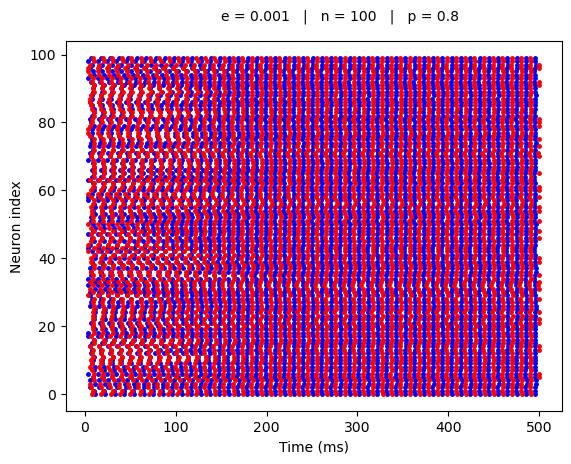

In [27]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

#### 2. Above, plus excitatory connections between neurons of the same group as well.

In [5]:
# Init all 100 neurons with random starting V
# Make a matrix representing random connections, the groups G1 and G2 are connected with probability of 0.6
# (Every neuron from group G1 has 0.6 probability of connecting to each neuron of group G2)
# 
# C = [pre, post]


start_scope()

inh = 0.001
exc = 0.001
n = 100

seed(11)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

<IPython.core.display.Javascript object>


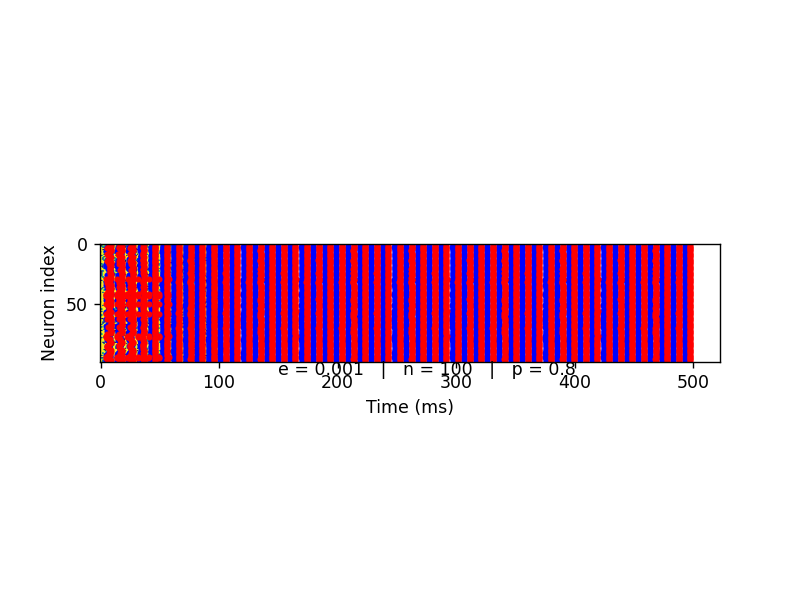

In [6]:
p = 0.8

I12 = choice(2, (n, n), p=[1-p, p])
sI1, tI1 = I12.nonzero()
I21 = choice(2, (n, n), p=[1-p, p])
sI2, tI2 = I21.nonzero()

E12 = 1 - I12
sE1, tE1 = E12.nonzero()
E21 = 1 - I21
sE2, tE2 = E21.nonzero()

imshow(I12);

In [7]:
# Inhibitory synapses
I1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# Self-excitatory synapses
S1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S2 = Synapses(G2, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

I1.connect(i=sI1, j=tI1)
I2.connect(i=sI2, j=tI2)

E1.connect(i=sE1, j=tE1)
E2.connect(i=sE2, j=tE2)

S1.connect(condition='i != j')
S2.connect(condition='i != j')

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

In [8]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

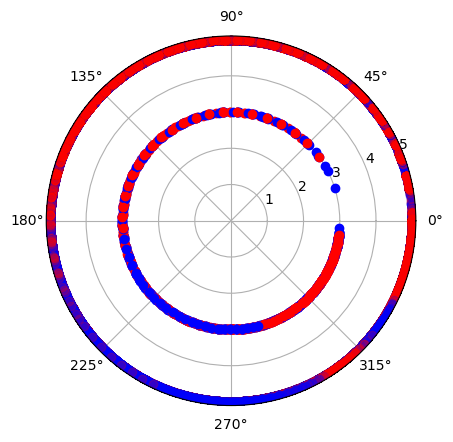

In [18]:
polared = lambda t, M : (M.v[:,t] * 2*pi, median(M.v[:,t] * 2*pi))
dummy = ones(n)*5
alph = 0.2

for t in range(500):
	timer = t

	pld1 = polared(timer, M1)

	pld2 = polared(timer, M2)

	M1_avg = pld1[1]
	M2_avg = pld2[1]

	polar(pld1[0], dummy, 'bo', alpha = alph)
	polar(pld2[0], dummy, 'ro', alpha = alph)

	polar(M1_avg, 3, 'bo')
	polar(M2_avg, 3, 'ro')

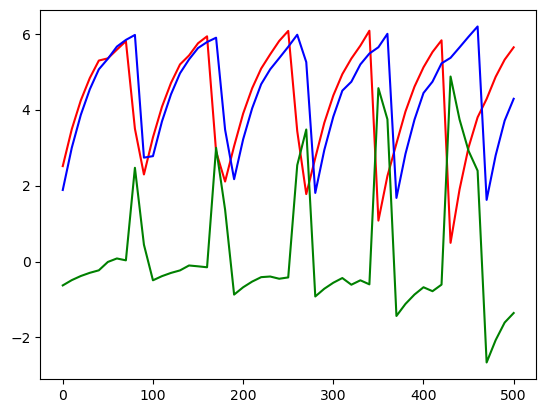

In [34]:
times = range(0, 501, 10)
M1_avgs = []
M2_avgs = []

for t in times:
        pd1 = polared(t, M1)
        pd2 = polared(t, M2)
        M1_avgs.append(pd1[1])
        M2_avgs.append(pd2[1])

plot(times, M1_avgs, color='red')
plot(times, M2_avgs, color='blue')
plot(times, subtract(M2_avgs, M1_avgs), color='green')

In [14]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


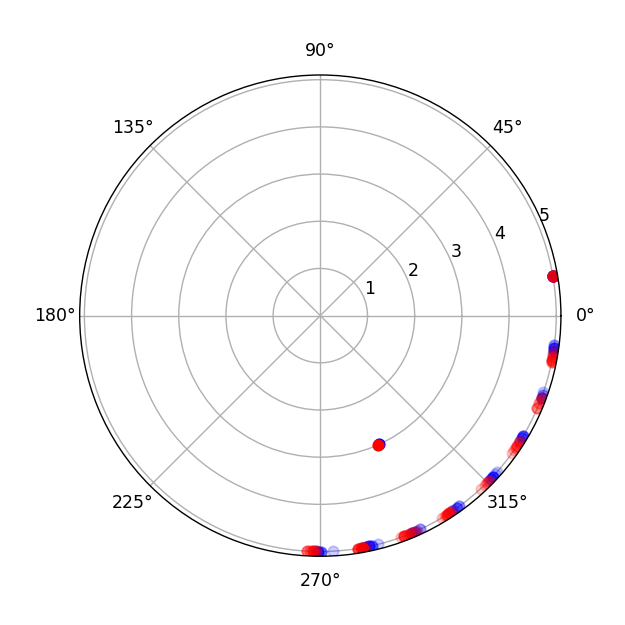

In [21]:
polared = lambda t, M : (M.v[:,t] * 2*pi, median(M.v[:,t] * 2*pi))
dummy = ones(n)*5
alph = 0.2

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)

def animate(frame_num):
    clf()
    timer = frame_num

    pld1 = polared(timer, M1)

    pld2 = polared(timer, M2)

    M1_avg = pld1[1]
    M2_avg = pld2[1]

    polar(pld1[0], dummy, 'bo', alpha = alph)
    polar(pld2[0], dummy, 'ro', alpha = alph)

    polar(M1_avg, 3, 'bo')
    polar(M2_avg, 3, 'ro')
    
    text(50, 50, 't = {}'.format(timer))

anim = FuncAnimation(fig, animate, frames=100, interval=20)
show()

<IPython.core.display.Javascript object>


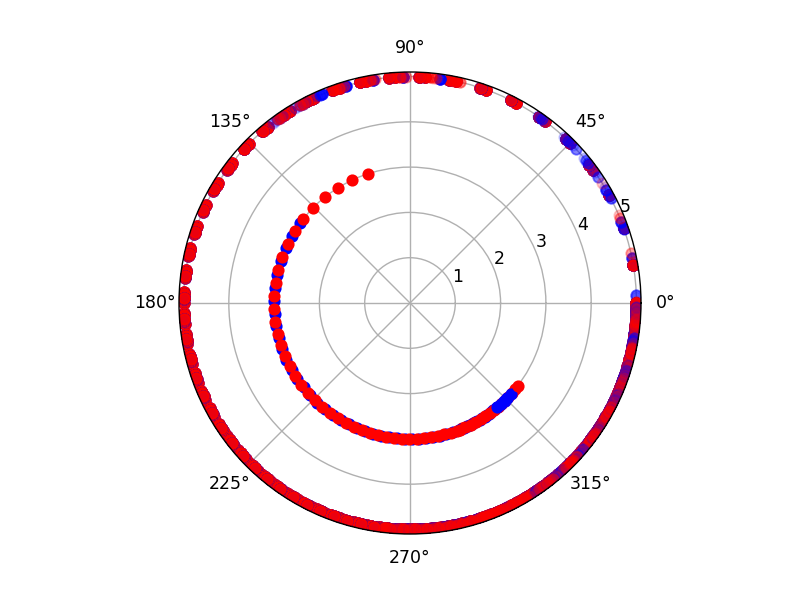

In [12]:
polared = lambda t, M : (M.v[:,t] * 2*pi, median(M.v[:,t] * 2*pi))
dummy = ones(n)*5
alph = 0.2

for t in range(80):
	timer = t

	pld1 = polared(timer, M1)

	pld2 = polared(timer, M2)

	M1_avg = pld1[1]
	M2_avg = pld2[1]

	polar(pld1[0], dummy, 'bo', alpha = alph)
	polar(pld2[0], dummy, 'ro', alpha = alph)

	polar(M1_avg, 3, 'bo')
	polar(M2_avg, 3, 'ro')